In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


In [8]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [13]:
X, y = mnist["data"], mnist["target"]
X.shape
y.shape

(70000,)

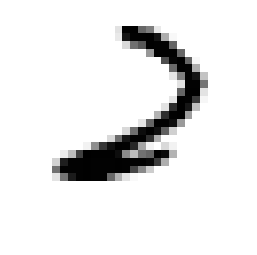

In [249]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[14000]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [250]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [251]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

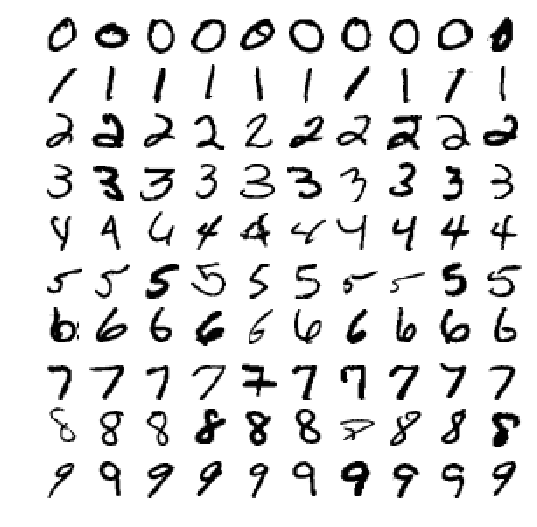

In [252]:
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)

plt.show()

In [294]:
y[14000]

2.0

In [254]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [255]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# Binary Classifier

In [256]:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits.
y_test_5 = (y_test == 5)

In [257]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [258]:
sgd_clf.predict([some_digit])

array([False], dtype=bool)

# Measuring Accuracy Using Cross-Validation

In [259]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([ 0.96645,  0.9572 ,  0.95105])

In [260]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.96645
0.9572
0.95105


In [261]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
        def fit(self, X, y=None):
                pass
        def predict(self, X):
            return np.zeros((len(X),1), dtype=bool)

In [262]:
never_5_clf = Never5Classifier()

cross_val_score(never_5_clf,X_train,y_train, cv=3, scoring="accuracy")

array([ 0.09935,  0.0978 ,  0.099  ])

In [263]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [264]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53992,   587],
       [ 1919,  3502]])

In [265]:
y_train_perfect_predictions = y_train_5

In [266]:
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

Precision = TP  / (TP + FP)

TP = True Positive

FP = False Positive

Recall = Sensitivity = True Positive Rate. 

The Ratio of positive instances that are correctly identified by the classifier.

Recall = TP / (TP + FN)

FN = False Negatives

In [267]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred) # 3804 / (1329+3804)

0.85644411836634871

In [268]:
recall_score(y_train_5, y_train_pred) # 3804 / 1617+3804

0.64600627190555249

F_1 = TP / (TP + ((FN + FP)/2))

In [269]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred) 

0.73648790746582538

In [270]:
3804 / (3804 + ((1617+1329)/2))

0.7208641273450824

In [271]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-696517.61703966])

In [272]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False], dtype=bool)

In [273]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [274]:
y_scores

array([-787761.63467179, -275563.71328911, -969590.5492435 , ...,
       -114704.19104774, -816641.51411899, -913815.97767353])

In [275]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

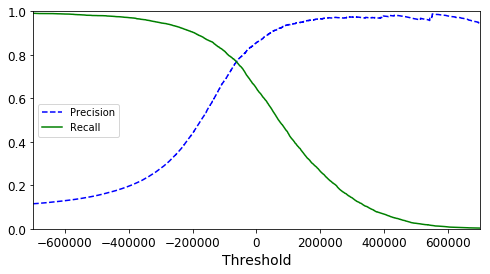

In [276]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0,1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
plt.show()

In [277]:
(y_train_pred == (y_scores > 0)).all()

True

In [278]:
y_train_pred_90 = (y_scores > 70000)
precision_score(y_train_5, y_train_pred_90)

0.91881793478260865

In [279]:
recall_score(y_train_5, y_train_pred_90)

0.49898542704298099

In [280]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

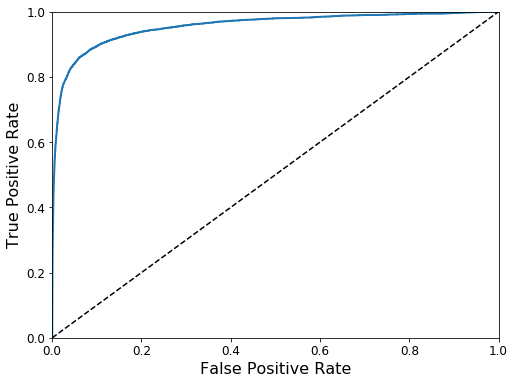

In [281]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [282]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.95560506805562329

In [283]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [284]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

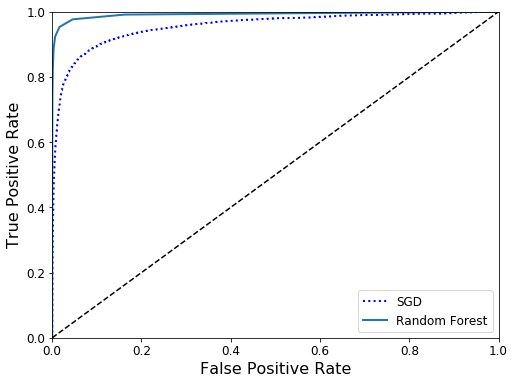

In [285]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=12)
plt.show()

In [286]:
roc_auc_score(y_train_5, y_scores_forest)

0.99167500073908466

In [287]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.98348381413785513

In [288]:
recall_score(y_train_5, y_train_pred_forest)

0.82383324109942813

# Multiclass classification

In [291]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([ 2.])

In [292]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[ -690671.05305078,  -598687.97181611,   142625.17146849,
         -355327.35120607,  -967392.54323707,  -696517.61703966,
          -60021.73217153, -1124835.3503355 ,  -430162.28540366,
        -1006904.39125504]])

In [293]:
np.argmax(some_digit_scores)

2

In [295]:
sgd_clf.classes_[5]

5.0

In [296]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier( random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([ 2.])

In [297]:
len(ovo_clf.estimators_)

45

In [298]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([ 2.])

In [299]:
forest_clf.predict_proba([some_digit])

array([[ 0. ,  0. ,  0.9,  0.1,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ]])

In [300]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.83338332,  0.85074254,  0.87108066])

In [301]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([ 0.91091782,  0.90714536,  0.90963645])

In [302]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5727,    2,   22,   12,   10,   59,   44,    9,   35,    3],
       [   1, 6452,   45,   32,    6,   51,    8,   14,  123,   10],
       [  57,   37, 5326,  107,   79,   20,   93,   53,  169,   17],
       [  50,   32,  132, 5361,    2,  237,   34,   46,  137,  100],
       [  23,   27,   38,    8, 5376,   12,   53,   34,   74,  197],
       [  72,   31,   35,  185,   67, 4621,  107,   29,  184,   90],
       [  34,   24,   66,    2,   45,   95, 5595,    7,   50,    0],
       [  24,   21,   73,   25,   64,   15,    6, 5773,   16,  248],
       [  53,  142,   69,  164,   14,  160,   57,   26, 5024,  142],
       [  43,   29,   25,   88,  147,   42,    3,  204,   69, 5299]])

In [303]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

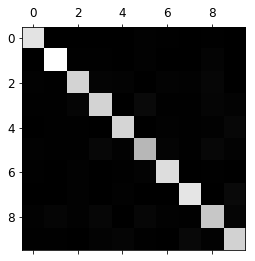

In [304]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [305]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

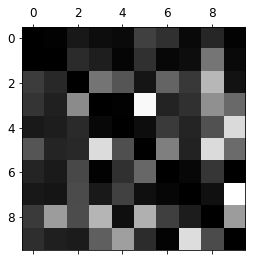

In [306]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

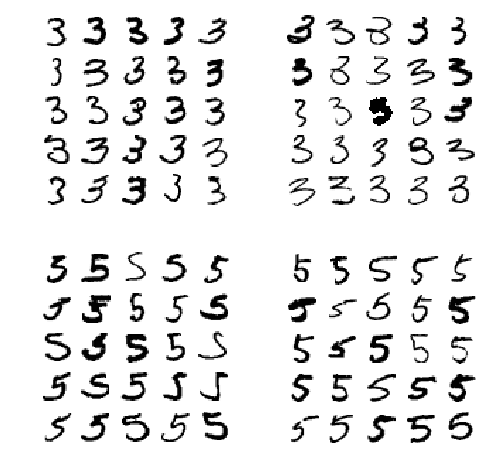

In [307]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

# Multilabel classification

In [308]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [309]:
knn_clf.predict([some_digit])

array([[False, False]], dtype=bool)

In [310]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3, n_jobs=-1)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.97698005749528494

# Multioutput classification

In [311]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

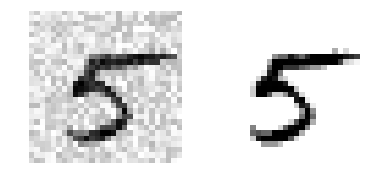

In [312]:
some_index = 5500
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])

plt.show()

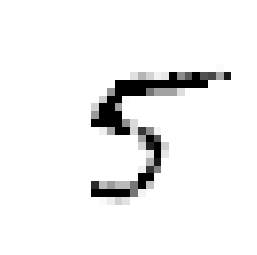

In [313]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)